Nonparametric statistical significance tests

non_parametric_tests_assign_solution.ipynb

Complete the assignment below.

References:
- Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.
- How to Calculate Nonparametric Statistical Hypothesis Tests in Python, Jason Brownlee, 2018.


# Imports

In [52]:
%reload_ext nb_black
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exercise 1

Our first dataset includes a very famous dataset, the Winsconsin Breast cancer dataset which is also available in https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). It includes features for cell nuclei for two categories of tumors: malignant and benign. As explained in the original data source:

>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Dataset:
- https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv

We will be using three of these features for our exercise: 
- diagnosis: the classification of the tumor with values "M" (malignant) and "B" (benign).
- area_mean: the average area covered by the tumor cells
- concavity_mean: severity of concave portions of the contour
- texture_mean: standard deviation of gray-scale values

For the three features described above(area_mean, concavity_mean, texture_mean), is there a difference in their average values in the two diagnosis groups? (Do samples of these features originate from the same distribution?)
- Select and apply the appropriate statistical test.
- Provide brief rationale for your selection of statistical test.
- Generate boxplots to compare experimental vs. control for t1, t2, and t3.


## Data

In [ ]:
df = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv"
)
df = df[["diagnosis", "area_mean", "concavity_mean", "texture_mean"]]

In [11]:
df.head()

,diagnosis,area_mean,concavity_mean,texture_mean
0,M,1001.0,0.3001,10.38
1,M,1326.0,0.0869,17.77
2,M,1203.0,0.1974,21.25
3,M,386.1,0.2414,20.38
4,M,1297.0,0.1980,14.34


In [12]:
malignant = df[df.diagnosis=='M'][['area_mean', 'concavity_mean', 'texture_mean']]
benign = df[df.diagnosis=='B'][['area_mean', 'concavity_mean', 'texture_mean']]

In [13]:
# Check the distribution of classes for the the diagnosis column
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diagnosis       569 non-null    object 
 1   area_mean       569 non-null    float64
 2   concavity_mean  569 non-null    float64
 3   texture_mean    569 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


In [14]:
malignant.head()

,area_mean,concavity_mean,texture_mean
0,1001.0,0.3001,10.38
1,1326.0,0.0869,17.77
2,1203.0,0.1974,21.25
3,386.1,0.2414,20.38
4,1297.0,0.1980,14.34


We explore if the referenced features follow a normal distribution. We examine the skewness and kurtosis of the groups.

Optional: We can run a Jarque–Bera test which tests if the data have the skewness and kurtosis matching a normal distribution.
In the case of the Jarque–Bera test the null hypothesis would state that the skewness and kurtosis matches that of a normal distribution.

Print the skewness and kurtosis of the groups. Optionally run a Jarque–Bera
Afterwards you can comment your findings wether the features follow a normal distribution of not.

## Distribution Normality

We explore if the referenced features follow a normal distribution. We examine the skewness and kurtosis of the groups.

Optional: We can run a Jarque–Bera test which tests if the data have the skewness and kurtosis matching a normal distribution. In the case of the Jarque–Bera test the null hypothesis would state that the skewness and kurtosis matches that of a normal distribution.

Print the skewness and kurtosis of the groups. Optionally run a Jarque–Bera Afterwards you can comment your findings wether the features follow a normal distribution of not.


In [22]:
#  kurtosis and skew of malignant group
_, _, _, _, m_skewness, m_kurtosis = stats.describe(malignant)
print("M Group")
print("Kurtosis: "+ str(m_kurtosis))
print("Skewness: "+str(m_skewness))

#  kurtosis and skew of benign group
_, _, _, _, b_skewness, b_kurtosis = stats.describe(benign)
print("B Group")
print("Kurtosis: "+ str(b_kurtosis))
print("Skewness: "+str(b_skewness))

M Group
Kurtosis: [2.22384345 1.09756062 2.29519808]
Skewness: [1.10974455 0.89523611 0.69855491]
B Group
Kurtosis: [ 0.28842005 20.52738898  1.18587586]
Skewness: [0.34082567 3.45865347 0.97721571]


In [28]:
#  Jarqu Bera tests on area_mean
_, mp_area_mean = stats.jarque_bera(malignant.area_mean)
print(mp_area_mean)

_, mb_area_mean = stats.jarque_bera(benign.area_mean)
print(mb_area_mean)

0.0
0.01700036600499155


In [29]:
#  Jarqu Bera tests on concavity_mean
_, mp_concavity_mean = stats.jarque_bera(malignant.concavity_mean)
print(mp_concavity_mean)

_, mb_concavity_mean = stats.jarque_bera(benign.concavity_mean)
print(mb_concavity_mean)

3.469000198208505e-09
0.0


In [30]:
#  Jarqu Bera tests on texture_mean
_, mp_texture_mean = stats.jarque_bera(malignant.texture_mean)
print(mp_texture_mean)

_, mb_texture_mean = stats.jarque_bera(benign.texture_mean)
print(mb_texture_mean)

1.4210854715202004e-14
0.0


**All 3 group variables seem not to follow a normal distribution**

## Distribution Plots

### Plot the histograms for the distribution of each feature and for each class (malignant/benign) to visually explore wether these distributions are skewed or not.

area_mean


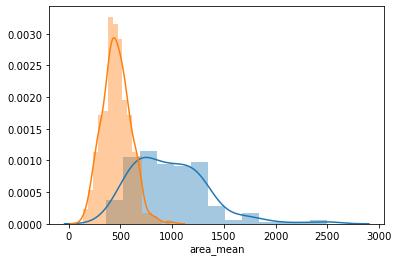

concavity_mean


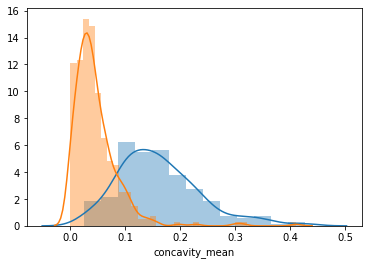

texture_mean


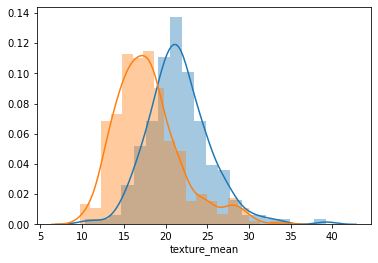

<IPython.core.display.Javascript object>

In [43]:
print("area_mean")
sns.distplot(malignant.area_mean)
sns.distplot(benign.area_mean)
plt.show()
print("concavity_mean")
sns.distplot(malignant.concavity_mean)
sns.distplot(benign.concavity_mean)
plt.show()
print("texture_mean")
sns.distplot(malignant.texture_mean)
sns.distplot(benign.texture_mean)
plt.show()

### Run 3 Kruskal-Wallis tests, one for each group/feature and describe the results of these tests. State wether the null hypothesis will be rejected or not.

In [45]:
#  kruskal-wallis test for m-group area_mean

_, area_mean_p = stats.kruskal(malignant.area_mean, benign.area_mean)
_, concavity_mean_p = stats.kruskal(malignant.concavity_mean, benign.concavity_mean)
_, texture_mean_p = stats.kruskal(malignant.texture_mean, benign.texture_mean)
print("area_mean_p: " + str(area_mean_p))
print("concavity_mean_p: " + str(concavity_mean_p))
print("texture_mean_p: " + str(texture_mean_p))

area_mean_p: 1.5326695021713592e-68
concavity_mean_p: 2.1545636238729746e-68
texture_mean_p: 3.418605714119009e-28


<IPython.core.display.Javascript object>

**The null for all 3 features will be rejected**

### Afterwards create 3 boxplots: one for each feature grouped by the diagnosis class.

area_mean


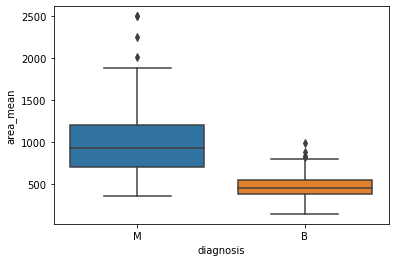

concavity_mean


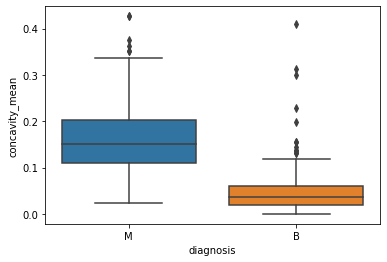

texture_mean


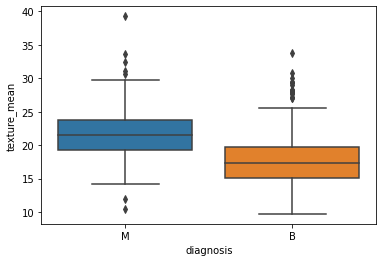

<IPython.core.display.Javascript object>

In [51]:
# boxplots for area_mean
print("area_mean")
sns.boxplot(x="diagnosis", y="area_mean", data=df)
plt.show()

# boxplots for concavity_mean
print("concavity_mean")
sns.boxplot(x="diagnosis", y="concavity_mean", data=df)
plt.show()

# boxplots for texture_mean
print("texture_mean")
sns.boxplot(x="diagnosis", y="texture_mean", data=df)
plt.show()

# Exercise 2

For the following test we will use the Real GDP per capita dataset for Europe available by Eurostat from the following address https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10
It contains the GDP per capita for each country (The indicator is calculated as the ratio of real GDP to the average population of a specific year.)
We will use the years 2007, 2008 and 2009 to check if the economic crisis of 2008 affected the GDP values of europe.

Dataset:
- https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_08_10


Questions:

Is there a difference in the GDP per capita between the years (2007 and 2008), (2008 and 2009)?
- Select and apply the appropriate statistical test.


## Data

Our dataset needs some cleaning at first. We extract only the columns of interest, clean numeric columns of unwanted characters and convert these columns to numeric.
We also remove rows that refer to collective index for many countries ("EA19", "EU27","EU28") and keep individual countries.

In [54]:
gdp = pd.read_csv(
    "https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/sdg_08_10.tsv.gz",
    compression="gzip",
    sep=r"\,|\t",
    usecols=["unit", "geo\\time", "2007 ", "2008 ", "2009 "],
    engine="python",
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
gdp.head(25)
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   unit      76 non-null     object
 1   geo\time  76 non-null     object
 2   2007      76 non-null     object
 3   2008      76 non-null     object
 4   2009      76 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
gdp = gdp[gdp.unit == "CLV10_EUR_HAB"].drop(["unit"], axis=1)
gdp.columns = ["country", "2007", "2008", "2009"]
gdp = gdp[~gdp.country.isin(["EA19", "EU27", "EU28"])]
gdp["2007"] = gdp["2007"].str.extract("(\d+)", expand=False).astype(int)
gdp["2008"] = gdp["2008"].str.extract("(\d+)", expand=False).astype(int)
gdp["2009"] = gdp["2009"].str.extract("(\d+)", expand=False).astype(int)
gdp.head()

,country,2007,2008,2009
0,AT,35870,36280,34830
1,BE,33760,33640,32700
2,BG,4820,5140,4990
3,CH,57720,58620,56750
4,CY,24420,24680,23550


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gdp.describe()

,2007,2008,2009
count,36.000000,36.000000,36.000000
mean,25373.333333,25318.611111,24006.666667
std,18766.614886,18370.088600,17547.584286
min,3200.000000,3370.000000,3350.000000
25%,10332.500000,10402.500000,9625.000000
50%,23535.000000,23380.000000,22315.000000
75%,35937.500000,36025.000000,33677.500000
max,84420.000000,81880.000000,76900.000000


Data that refer to economic indices usually do not follow a normal distribution, something we can easily observe by visualizing the data below, hence we should use non parametric tests.

## Distribution plots

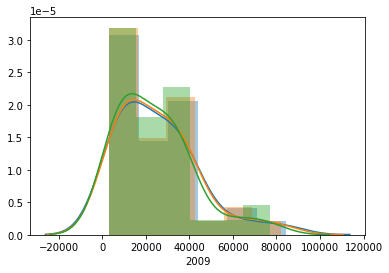

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# histogram for the values of each year.
sns.distplot(gdp["2007"])
sns.distplot(gdp["2008"])
sns.distplot(gdp["2009"])
plt.show()

## Wilcoxon Signed-rank Test

We will run a Wilcoxon Signed-rank Test, which should be run on paired samples or repeated measurements on a single sample. In our case we have repeated measurements (three years) of GDP for the same countries.

The null hypothesis for this test is that the medians of two samples are equal.
First we compare 2007 with 2008 values:

In [65]:
# Wilcoxon Signed-rank test for years (groups) 2007 and 2008 and describe the results of the test.
_, p = stats.wilcoxon(gdp["2007"], gdp["2008"])
print(p)
print("Reject null hypothesis: " + str(p < 0.05))

0.39180684742166216
Reject null hypothesis: False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Failed to reject the null hypothesis that the sample medians are equal.

In [66]:
# Run a Wilcoxon Signed-rank Test for years (groups) 2008 and 2009 and describe the results of the test.
_, p = stats.wilcoxon(gdp["2008"], gdp["2009"])
print(p)
print("Reject null hypothesis: " + str(p < 0.05))

2.356281382362627e-07
Reject null hypothesis: True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reject null hypothesis that the sample medians are equal.